In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error as MSE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lassom
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor

# 1. Import the train datasets

In [2]:
X_train = pd.read_csv("data-train.csv",index_col=0)
Y_train = X_train.sales
X_train = X_train.drop(['sales'],axis=1)

In [3]:
#X_train = pd.read_csv("B_encoded_train_data.csv",index_col=0)
#Y_train = pd.read_csv("A_sales_train.csv",index_col=0)

In [4]:
Model_1 = BaggingRegressor()

# 2. Setup Pipeline

In [5]:

RG = Model_1

In [6]:

pipe = Pipeline(steps=[("RG",RG)])

In [7]:
param_grid = {
    "RG__bootstrap":[True,False],
    "RG__bootstrap_features":[True,False],
    "RG__n_estimators":[10,100,1000]
}

# 3. Setup GridSearch

In [8]:
score_metric = 'neg_mean_squared_error'
search = GridSearchCV(pipe,param_grid,
                      n_jobs=-1,
                      cv=10,
                      scoring=score_metric)

In [9]:
search.fit(X_train,Y_train.values.ravel())

GridSearchCV(cv=10, estimator=Pipeline(steps=[('RG', BaggingRegressor())]),
             n_jobs=-1,
             param_grid={'RG__bootstrap': [True, False],
                         'RG__bootstrap_features': [True, False],
                         'RG__n_estimators': [10, 100, 1000]},
             scoring='neg_mean_squared_error')

In [10]:
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=-472.547):
{'RG__bootstrap': True, 'RG__bootstrap_features': False, 'RG__n_estimators': 1000}


In [11]:
df = pd.DataFrame(search.cv_results_)
df = df.sort_values(by=['rank_test_score'])
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_RG__bootstrap,param_RG__bootstrap_features,param_RG__n_estimators,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
5,27.232633,0.947042,0.211279,0.010959,True,False,1000,"{'RG__bootstrap': True, 'RG__bootstrap_feature...",-148.918940,-254.342148,...,-625.510420,-1180.997742,-146.986019,-379.604905,-404.369087,-574.936578,-274.054507,-472.547490,302.669170,1
4,3.021466,0.443338,0.025455,0.004423,True,False,100,"{'RG__bootstrap': True, 'RG__bootstrap_feature...",-150.835419,-279.482062,...,-601.558354,-1282.710573,-145.961242,-375.204465,-408.685654,-579.942186,-286.165941,-487.163595,325.789153,2
3,0.273968,0.010394,0.005286,0.000639,True,False,10,"{'RG__bootstrap': True, 'RG__bootstrap_feature...",-186.279698,-364.282888,...,-695.153966,-1066.747143,-250.742987,-391.703680,-428.479307,-579.059048,-293.250043,-497.153221,255.068271,3
2,30.043485,0.705150,0.216322,0.022445,True,True,1000,"{'RG__bootstrap': True, 'RG__bootstrap_feature...",-196.658093,-259.017141,...,-756.712879,-1504.707138,-215.451033,-508.792798,-357.015132,-634.440344,-269.117778,-526.187325,373.501733,4
8,48.669369,1.336933,0.288651,0.053997,False,True,1000,"{'RG__bootstrap': False, 'RG__bootstrap_featur...",-170.658737,-265.042758,...,-413.063240,-1717.001493,-235.630057,-455.494123,-384.050405,-592.030256,-345.273509,-529.657396,425.313969,5
7,4.438134,0.189049,0.026837,0.012262,False,True,100,"{'RG__bootstrap': False, 'RG__bootstrap_featur...",-164.326977,-260.066094,...,-403.754575,-1764.338124,-242.596651,-479.714071,-379.380021,-556.100425,-384.342768,-542.717092,440.810445,6
0,0.317654,0.029736,0.003990,0.002676,True,True,10,"{'RG__bootstrap': True, 'RG__bootstrap_feature...",-239.588405,-332.764397,...,-870.267931,-1264.883290,-224.775065,-701.955281,-435.358355,-654.469870,-321.259221,-572.127927,311.991319,7
1,3.130712,0.357267,0.029201,0.009297,True,True,100,"{'RG__bootstrap': True, 'RG__bootstrap_feature...",-184.335888,-295.381793,...,-908.700920,-1658.157175,-276.223087,-495.792898,-352.248877,-636.705910,-252.639620,-574.004837,421.812760,8
6,0.449091,0.027120,0.004189,0.002130,False,True,10,"{'RG__bootstrap': False, 'RG__bootstrap_featur...",-217.403879,-224.541681,...,-557.082198,-1559.243117,-341.420866,-642.832251,-378.361905,-733.218571,-334.343074,-574.827496,378.772794,9
9,0.522370,0.163874,0.006282,0.001267,False,False,10,"{'RG__bootstrap': False, 'RG__bootstrap_featur...",-335.985862,-337.917802,...,-657.636724,-1970.420087,-364.814589,-724.435195,-486.836710,-653.606017,-790.129784,-754.742212,478.994989,10


# 4. Best Hyperparameter

In [12]:
parms = pd.DataFrame(df['params'])
for i in parms.iloc[0]:
    print(i)

{'RG__bootstrap': True, 'RG__bootstrap_features': False, 'RG__n_estimators': 1000}


# 5. Evaluate Model $log(Sales)$

In [13]:
best_boot = parms.iloc[0][0]['RG__bootstrap']
best_boot_feat = parms.iloc[0][0]['RG__bootstrap_features']
best_n_est = parms.iloc[0][0]['RG__n_estimators']

In [14]:
Model_2 = BaggingRegressor(bootstrap=best_boot,bootstrap_features=best_boot_feat,n_estimators=best_n_est)

In [15]:
X_train1,X_test1,Y_train1,Y_test1 = train_test_split(X_train,Y_train,test_size=0.2,random_state=132)


In [16]:

RG1 = Model_2
RG1.fit(X_train1,Y_train1.values.ravel())

BaggingRegressor(n_estimators=1000)

In [17]:
MSE(RG1.predict(X_test1),Y_test1)

314.8155816004319

In [18]:
result = pd.DataFrame(Y_test1)

In [19]:
result["Predicted_sales"] = RG1.predict(X_test1)

In [20]:
MSE(result["sales"],result["Predicted_sales"])

314.8155816004319

# 6. Inventory Decision

In [21]:
residual = result['sales']-result['Predicted_sales']

In [22]:
Price=20
Cost=12
Salvage=8
Over=Cost - Salvage
Under=Price - Cost
Over, Under

(4, 8)

### QQ plot to explore the distribution of residual

#### Normal Distribution

In [23]:
import scipy.stats as sct

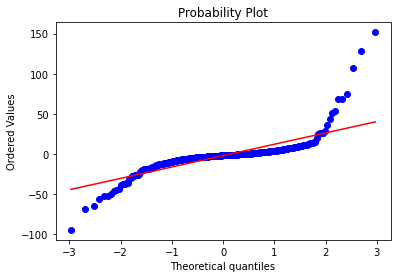

In [24]:
import scipy
scipy.stats.probplot(residual, dist="norm", plot=plt)
plt.show()

In [25]:
s = residual.std()
opt_dec_N=round(sct.norm.ppf(Under/(Under+Over))*s + result['Predicted_sales'])

#### Exponential Distribution

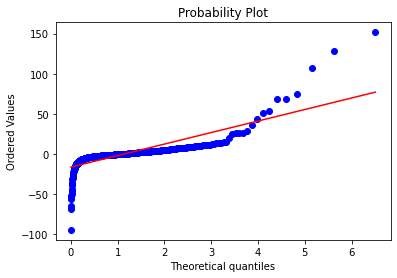

In [26]:
scipy.stats.probplot(residual, dist="expon", plot=plt)
plt.show()

In [27]:
opt_dec_E=round((-result['Predicted_sales'])*np.log(1-(Under/(Under+Over))))

#### Empirical Distribution

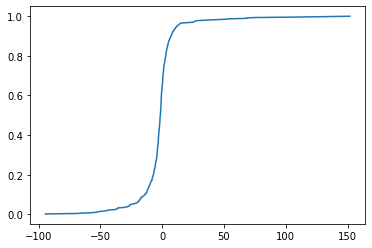

In [28]:
size = residual.shape[0]
step=1/size
jumps = [step*i for i in range(1,size+1)]
Sample = sorted(residual)
plt.plot(Sample,jumps)

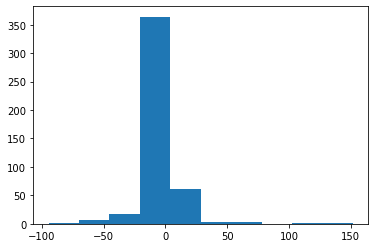

In [29]:
plt.hist(Sample)
plt.show()

In [30]:
def inv(sample,jump,area):
    size = len(sample)
    i=0
    temp=jump[i]
    while temp<area:
        i+=1
        temp=jump[i]
        
    return sample[i]

In [31]:
offset = inv(Sample,jumps,2/3)
offset

0.21499999999999986

In [32]:
opt_dec_B = round(result['Predicted_sales']+offset)

# 7. Out-of-samples Profit

In [33]:
#max profit for test data set
max_profit = result['sales'].sum()*(Price-Cost)
max_profit

82096

In [34]:
def profit(demand,inv):
    return (Price-Salvage)*np.minimum(demand,inv)-(Cost-Salvage)*inv

In [35]:
#Profit (Normal)
profit_lst_N = profit(result['sales'],opt_dec_N)
profit_lst_N.sum()

53616.0

In [36]:
#Profit (Exponential)
profit_lst_E = profit(result['sales'],opt_dec_E)
profit_lst_E.sum()

60020.0

In [37]:
#Profit (Empirical)
profit_lst_B = profit(result['sales'],opt_dec_B)
profit_lst_B.sum()

60096.0

# 8. K-Fold Cross Validation

### Repeat steps 5,6,7 with 10-fold cross validation

In [38]:
Model_4= Model_2 = BaggingRegressor(bootstrap=best_boot,bootstrap_features=best_boot_feat,n_estimators=best_n_est)

In [39]:
from sklearn.model_selection import KFold
k=10
kf = KFold(n_splits=k)
X_train_t=X_train.to_numpy()
Y_train_t=Y_train.to_numpy()
model = []
mse_lst = []
max_profit_lst = []
profit_N_lst = []
profit_E_lst = []
profit_B_lst = []

for train_index,test_index in kf.split(X_train_t):
    X_train_K,X_test_K=X_train_t[train_index],X_train_t[test_index]
    Y_train_K,Y_test_K=Y_train_t[train_index],Y_train_t[test_index]
    
    #PCA to transform train data
    
    #Model
    RG_K = Model_4
    RG_K.fit(X_train_K,Y_train_K.ravel())
    
    #pca to transform test data
    
    #MSE
    mse_lst.append(MSE(RG_K.predict(X_test_K),Y_test_K))
    
    #Transform log(sale) back to sale
    result_K = pd.DataFrame(Y_test_K)
    result_K["Predicted_sales"] = RG_K.predict(X_test_K)
    
    #Obtain residual
    residual_K = result_K[0]-result_K['Predicted_sales']
    
    #Get std for Normal distribution
    s_K = residual.std()
    
    #Inventory Decision (Normal)
    opt_dec_N_K=np.ceil(sct.norm.ppf(Under/(Under+Over))*s_K + result_K['Predicted_sales'])
    #Inventory Decision (Exponential)
    opt_dec_E_K=np.ceil((-result_K['Predicted_sales'])*np.log(1-(Under/(Under+Over))))
    
    #Inventory Decision (Empirical Distribution)
    size_K = residual_K.shape[0]
    step_K=1/size_K
    jumps_K = [step_K*i for i in range(1,size+1)]
    Sample_K = sorted(residual_K)
    offset_K = inv(Sample_K,jumps_K,2/3)
    opt_dec_B_K = np.ceil(result_K['Predicted_sales']+offset_K)
    
    #Out-of_sample profit
    profit_lst_B_K = profit(result_K[0],opt_dec_B_K)
    profit_B_lst.append(profit_lst_B_K.sum())
    
    profit_lst_N_K = profit(result_K[0],opt_dec_N_K)
    profit_N_lst.append(profit_lst_N_K.sum())
    
    profit_lst_E_K = profit(result_K[0],opt_dec_E_K)
    profit_E_lst.append(profit_lst_E_K.sum())
    
    max_profit_K = result_K[0].sum()*(Price-Cost)
    max_profit_lst.append(max_profit_K)
    
max_profit_lst = np.array(max_profit_lst)
profit_N_lst = np.array(profit_N_lst)
profit_E_lst = np.array(profit_E_lst)
profit_B_lst = np.array(profit_B_lst)

fraction_of_max_N = profit_N_lst/max_profit_lst
fraction_of_max_E = profit_E_lst/max_profit_lst
fraction_of_max_B = profit_B_lst/max_profit_lst

dist_profit = ["Normal","Exponential","Empirical","Max"]
dist_frac = ["Normal","Exponential","Empirical"]
col_name = ["Dataset_"+str(i) for i in range(1,k+1)]

profit_lst = [profit_N_lst,profit_E_lst,profit_B_lst,max_profit_lst]
profit_table = pd.DataFrame(profit_lst,index=dist_profit,columns=col_name)
profit_table["mean_profit"]=profit_table.mean(axis=1)
profit_table["std_profit"]=profit_table.std(ddof=1,axis=1)

fraction_lst = [fraction_of_max_N,fraction_of_max_E,fraction_of_max_B]
fraction_table = pd.DataFrame(fraction_lst,index=dist_frac,columns=col_name)
fraction_table["mean_fraction"]=fraction_table.mean(axis=1)

In [40]:
fraction_table

,Dataset_1,Dataset_2,Dataset_3,Dataset_4,Dataset_5,Dataset_6,Dataset_7,Dataset_8,Dataset_9,Dataset_10,mean_fraction
Normal,0.691282,0.700636,0.647227,0.681373,0.651330,0.684798,0.703562,0.675455,0.642985,0.655590,0.673424
Exponential,0.777595,0.753756,0.717384,0.751416,0.726350,0.771768,0.762784,0.725759,0.708035,0.740396,0.743524
Empirical,0.786777,0.751016,0.718421,0.741888,0.710878,0.775149,0.747509,0.725152,0.713404,0.741932,0.741213


In [41]:
profit_table

,Dataset_1,Dataset_2,Dataset_3,Dataset_4,Dataset_5,Dataset_6,Dataset_7,Dataset_8,Dataset_9,Dataset_10,mean_profit,std_profit
Normal,28608.0,31708.0,29964.0,31752.0,32332.0,26740.0,34452.0,31152.0,28744.0,27304.0,30275.6,2307.062166
Exponential,32180.0,34112.0,33212.0,35016.0,36056.0,30136.0,37352.0,33472.0,31652.0,30836.0,33402.4,2181.815904
Empirical,32560.0,33988.0,33260.0,34572.0,35288.0,30268.0,36604.0,33444.0,31892.0,30900.0,33277.6,1856.348416
Max,41384.0,45256.0,46296.0,46600.0,49640.0,39048.0,48968.0,46120.0,44704.0,41648.0,44966.4,3203.875254


In [42]:
profit_table.to_csv(".\\Model_Selection_Result\\4.4B_Bagging(No_PCA).csv")

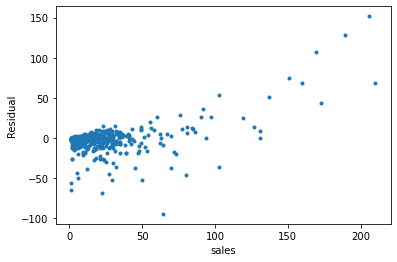

In [43]:
plt.xlabel("sales")
plt.ylabel("Residual")
plt.plot(result['sales'],residual,".")